# Interresolution figure

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import matplotlib.path as mpath
import xarray as xr
import cf_xarray
import cmocean as cm

In [2]:
# Import the data (names generalised to use for both comparisons)

data_1 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/surface_velocity_map_Pan01.nc', chunks = 'auto')
data_2 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/surface_velocity_map_Pan005.nc', chunks = 'auto')

In [3]:
# Land and contour data
shelf_contour_1 = xr.open_dataset('/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_01deg.nc')['contour_masked_above']
shelf_contour_2 = xr.open_dataset('/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_005deg.nc')['contour_masked_above']

depth_1 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output050/20050501.ocean_static.nc')['deptho']
land_mask_1 = (0 * depth_1).fillna(1)
land_1 = xr.where(np.isnan(depth_1.rename('land_1')), 1, np.nan)

depth_2 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-005-zstar-ACCESSyr2/output030/19930701.ocean_static.nc')['deptho']
land_mask_2 = (0 * depth_2).fillna(1)
land_2 = xr.where(np.isnan(depth_2.rename('land_2')), 1, np.nan)

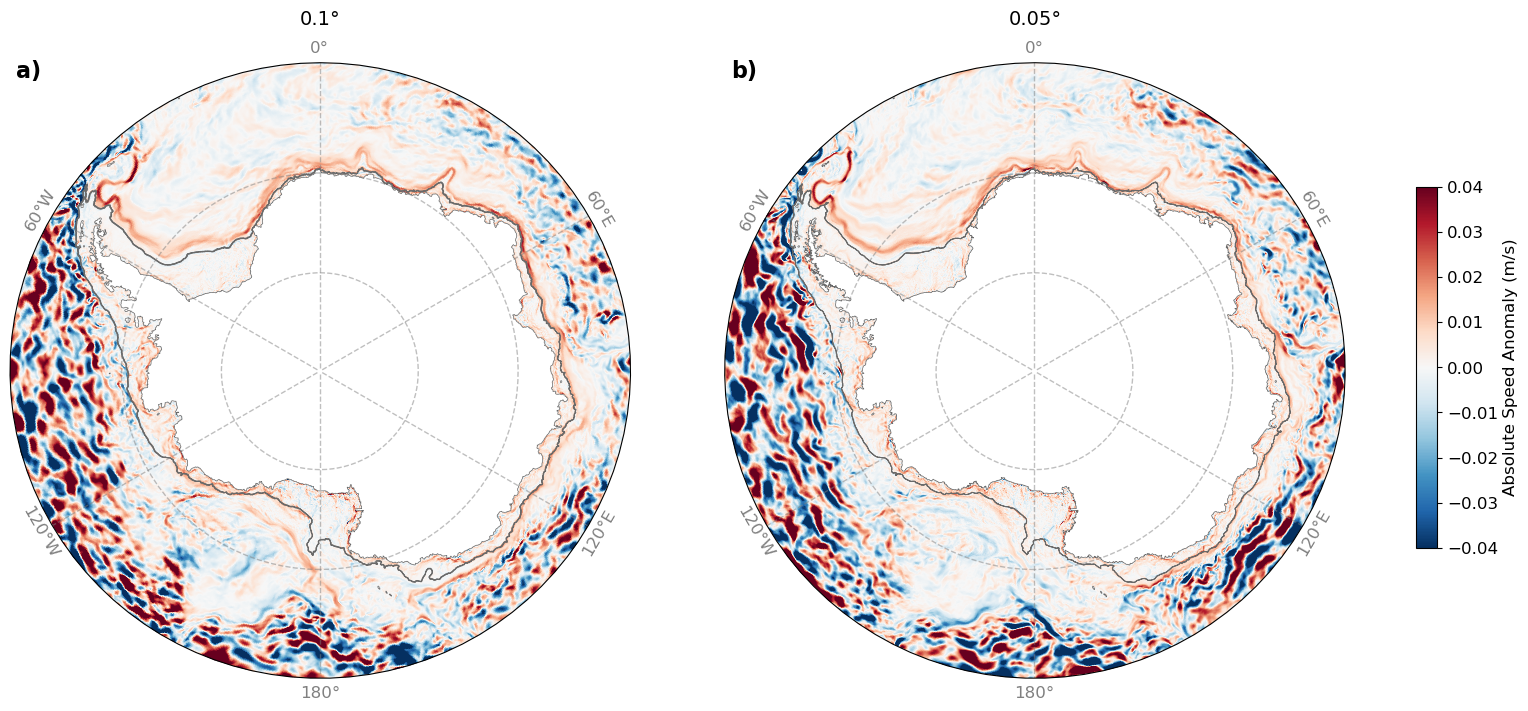

In [4]:
plt.rcParams['font.size'] = 16

# Projection
projection = ccrs.SouthPolarStereo()

# Figure with 2 subplots side by side
fig, axes = plt.subplots(
    nrows=1, ncols=2,
    subplot_kw={"projection": projection},
    figsize=(16, 7),
    constrained_layout=True
)

# Shared circle boundary
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.495], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# Datasets, land masks, shelf masks, and titles
datasets = [data_1, data_2] 
land_masks = [land_1, land_2]
land_contours = [land_mask_1, land_mask_2]
shelf_masks = [shelf_contour_1, shelf_contour_2]
titles = ["0.1°", "0.05°"]

# Longitude label settings for rotation
label_lon = ['0°', '180°', '60°E', '120°W', '120°E', '60°W']
rot_lon = [0, 0, -60, -60, 60, 60]
lat_lon_label = [-58, -58, -58, -58, -58, -58]

# Loop over subplots
for i, (ax, data, land_m, land_contour, shelf_m, title) in enumerate(zip(
        axes, datasets, land_masks, land_contours, shelf_masks, titles)):

    ax.set_extent([-280, 80, -80, -59], crs=ccrs.PlateCarree())
    ax.set_boundary(circle, transform=ax.transAxes)

    # Filled land
    land_m.plot.contourf(ax=ax, colors='white',
                         zorder=2, transform=ccrs.PlateCarree(),
                         add_colorbar=False)

    # Coast line
    ax.contour(land_contour.cf['X'], land_contour.cf['Y'], land_contour,
               levels=[0, 1], colors='dimgrey', linewidths=0.5,
               transform=ccrs.PlateCarree())

    # Shelf contour
    ax.contour(shelf_m.cf['X'], shelf_m.cf['Y'], shelf_m,
               levels=[0, 1], colors='dimgrey', linewidths=0.5,
               transform=ccrs.PlateCarree())

    # Gridlines (keep as in original plot)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=1, xlocs=range(-180, 171, 60), ylocs=[],
                      color='gray', alpha=0.5, linestyle='--', zorder=10)
    gl2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                       linewidth=1, xlocs=[], ylocs=(-80, -70, -55),
                       color='gray', alpha=0.5, linestyle='--', zorder=10)

    # Manually rotate longitude labels
    for j, position in enumerate([0, 180, 60, -120, 120, -60]):
        ax.text(position, lat_lon_label[j], label_lon[j], rotation=rot_lon[j],
                ha='center', va='center', color='gray', fontsize=12,
                transform=ccrs.PlateCarree())

    # Plot dataset
    im = data.plot(
        x="xh", y="yh",
        transform=ccrs.PlateCarree(),
        vmin=-0.04, vmax=0.04,
        extend="both",
        cmap=plt.get_cmap('RdBu').reversed(),
        add_colorbar=False,
        ax=ax,
    )

    # Set title
    ax.set_title(title, fontsize=14, pad=25)

    # Add subplot label (a), (b), etc.
    ax.text(0.01,1, f'{chr(97+i)})', transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left', color='black')


# Smaller shared colorbar on the right
cbar = fig.colorbar(
    im, ax=axes, orientation="vertical",
    fraction=0.015,  # smaller width
    aspect=17,       # longer and thinner
    shrink=0.8, pad=0.05
)
cbar.set_label("Absolute Speed Anomaly (m/s)", fontsize=12)
cbar.ax.tick_params(labelsize=12)  # tick font size

plt.show()

fig.savefig("/g/data/g40/kc5856/thesis_figures/resolution_surfacevelocity_maps.png", dpi=300, bbox_inches='tight')

# West Antarctic ACoC plot

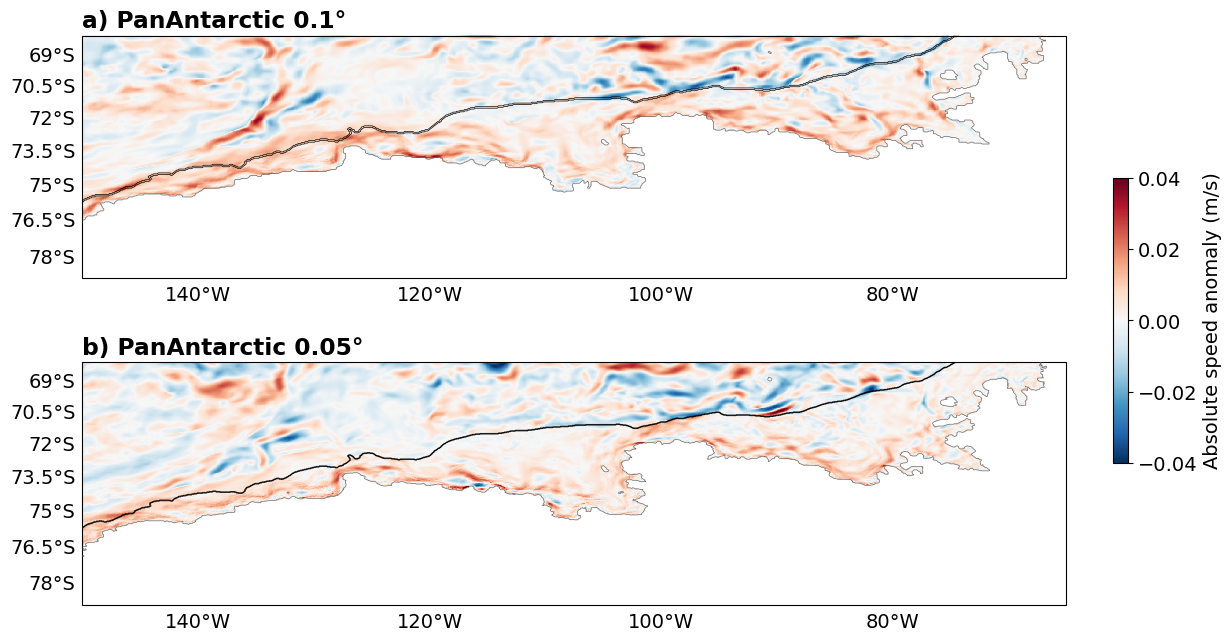

In [9]:
# --- Define region of interest (West Antarctic shelf) ---
lon_min, lon_max = -150, -65
lat_min, lat_max = -75, -68

# --- Group datasets ---
datasets = [
    {
        "data": data_1,
        "land": land_1,
        "shelf_contour": shelf_contour_1,
        "land_mask": land_mask_1,
        "title": "a) PanAntarctic 0.1°"
    },
    {
        "data": data_2,
        "land": land_2,
        "shelf_contour": shelf_contour_2,
        "land_mask": land_mask_2,
        "title": "b) PanAntarctic 0.05°"
    }
]

# --- Figure and layout setup ---
plt.rcParams['font.size'] = 14
n = len(datasets)

fig = plt.figure(figsize=(13.5, 6.3),constrained_layout=True) 
gs = fig.add_gridspec(n, 1, height_ratios=[1,1], hspace=0.1)  

axes = [fig.add_subplot(gs[i, 0], projection=ccrs.Miller()) for i in range(n)]

# --- Plot setup ---
vmin, vmax = -0.04, 0.04
cmap = plt.get_cmap('RdBu').reversed()
mappables = []

for ax, dset in zip(axes, datasets):
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(dset["title"], loc='left',fontweight='bold')

    # Main field
    mappable = dset["data"].plot(
        ax=ax, transform=ccrs.PlateCarree(),
        cmap=cmap, vmin=vmin, vmax=vmax, add_colorbar=False
    )
    mappables.append(mappable)

    # Filled land
    dset["land"].plot.contourf(
        ax=ax, colors='white',
        transform=ccrs.PlateCarree(), add_colorbar=False
    )

    # 1000 m isobath
    dset["shelf_contour"].plot.contour(
        ax=ax, levels=[1], colors='k', linewidths=.5,
        transform=ccrs.PlateCarree()
    )

    # Coastline
    ax.contour(
        dset["land_mask"].cf['X'], dset["land_mask"].cf['Y'], dset["land_mask"],
        levels=[0, 1], colors='dimgrey', linewidths=0.5,zorder=4,
        transform=ccrs.PlateCarree()
    )

    # Minimal labels/gridlines
    gl = ax.gridlines(draw_labels=True,alpha=0)
    gl.top_labels = gl.right_labels = False

    
for ax in axes:
    ax.set_ylabel("Latitude")   # Loop over list
axes[-1].set_xlabel("Longitude")  # Only bottom axis

# --- Shared colorbar ---
cbar = fig.colorbar(
    mappables[0], ax=axes, orientation='vertical',shrink=0.5,
    fraction=0.1, pad=0.04
)
cbar.set_label("Absolute speed anomaly (m/s)")

plt.show()
fig.savefig("/g/data/g40/kc5856/thesis_figures/resolution_acoc_maps.png", dpi=300, bbox_inches='tight')

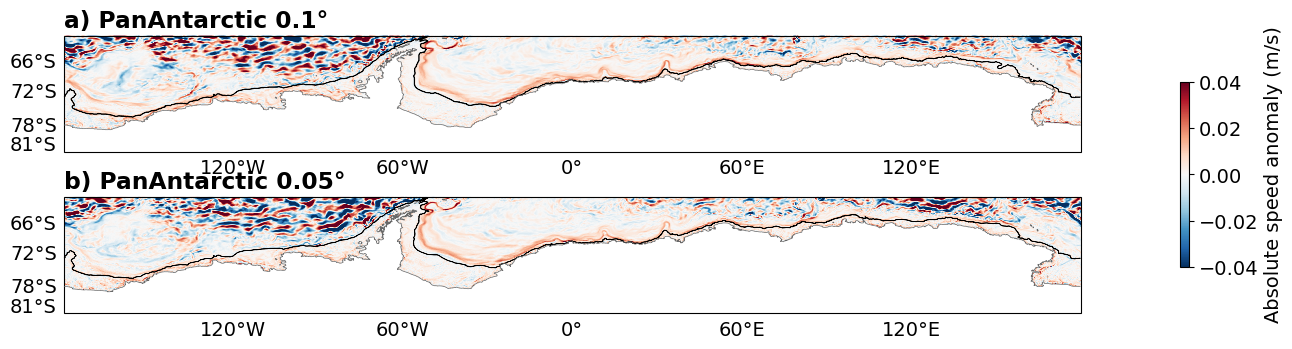

In [16]:
# --- Define region of interest (circumpolar) ---

# --- Group datasets ---
datasets = [
    {
        "data": data_1,
        "land": land_1,
        "shelf_contour": shelf_contour_1,
        "land_mask": land_mask_1,
        "title": "a) PanAntarctic 0.1°"
    },
    {
        "data": data_2,
        "land": land_2,
        "shelf_contour": shelf_contour_2,
        "land_mask": land_mask_2,
        "title": "b) PanAntarctic 0.05°"
    }
]

# --- Figure and layout setup ---
plt.rcParams['font.size'] = 14
n = len(datasets)

fig = plt.figure(figsize=(16, 4))  # taller figure overall
gs = fig.add_gridspec(n, 1, height_ratios=[1,1], hspace=0.1)  # small hspace between maps

axes = [fig.add_subplot(gs[i, 0], projection=ccrs.Miller()) for i in range(n)]

# --- Plot setup ---
vmin, vmax = -0.04, 0.04
cmap = plt.get_cmap('RdBu').reversed()
mappables = []

for ax, dset in zip(axes, datasets):
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])


    ax.set_extent([-280, -30, -82, -60], crs=ccrs.PlateCarree())
    ax.set_title(dset["title"], loc='left',fontweight='bold')

    # Main field
    mappable = dset["data"].plot(
        ax=ax, transform=ccrs.PlateCarree(),
        cmap=cmap, vmin=vmin, vmax=vmax, add_colorbar=False
    )
    mappables.append(mappable)

    # Filled land
    dset["land"].plot.contourf(
        ax=ax, colors='white',
        transform=ccrs.PlateCarree(), add_colorbar=False
    )

    # 1000 m isobath
    dset["shelf_contour"].plot.contour(
        ax=ax, levels=[1], colors='k', linewidths=.5,
        transform=ccrs.PlateCarree()
    )

    # Coastline
    ax.contour(
        dset["land_mask"].cf['X'], dset["land_mask"].cf['Y'], dset["land_mask"],
        levels=[0, 1], colors='dimgrey', linewidths=0.5,zorder=4,
        transform=ccrs.PlateCarree()
    )

    # Minimal labels/gridlines
    gl = ax.gridlines(draw_labels=True,alpha=0)
    gl.top_labels = gl.right_labels = False

# --- Shared colorbar ---
cbar = fig.colorbar(
    mappables[0], ax=axes, orientation='vertical',shrink=0.6,
    fraction=0.1, pad=0.08
)
cbar.set_label("Absolute speed anomaly (m/s)")

plt.show()
#fig.savefig("/g/data/g40/kc5856/thesis_figures/resolution_acoc_maps.png", dpi=300, bbox_inches='tight')

In [ ]:
# Optional: Add vlines and region labels
ax0.vlines([-280, -200, -150, -100, -65, 0, 80], -82, -58, color='grey', linewidth=1)

region_labels = ['Adelie', 'Ross', 'Amundsen', 'Bellings-\nhausen', 'Weddell', 'Prydz']
region_lons = [-240, -175, -125, -84, -33, 40]
for x, name in zip(region_lons, region_labels):
    ax0.text(x, -64, name, ha='center', va='bottom', fontsize=11, color='w')

# Making my own 3000m isobath contour

In [44]:
anomaly_1 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/surface_velocity_map_Pan01.nc')
control_1 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/surface_velocity_map_control_Pan01.nc')

In [45]:
anomaly_2 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/surface_velocity_map_Pan005.nc')
control_2 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/surface_velocity_map_control_Pan005.nc')

In [88]:
contour_depth = 2500 # metres

Text(0.5, 1.0, 'Ocean depth (m)')

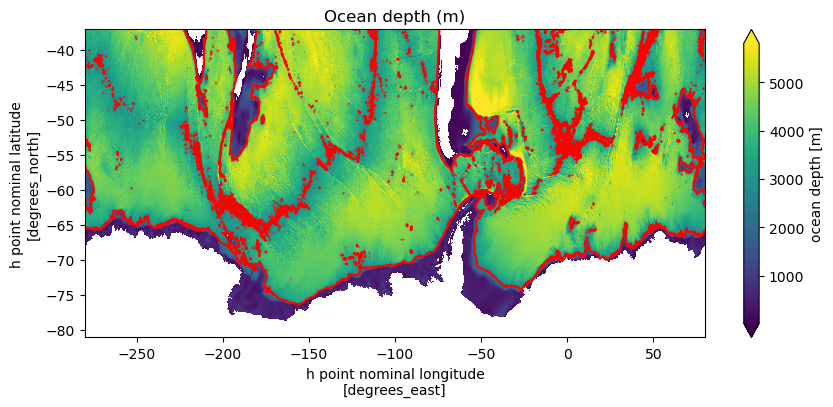

In [89]:
fig = plt.figure(figsize = (10, 4))

depth_2.plot(extend='both', cbar_kwargs={'label': "ocean depth [m]"})
depth_2.plot.contour(levels = [contour_depth], colors = 'r', linestyles = '-')
plt.title('Ocean depth (m)')

In [90]:
depth_2_edit = depth_2.fillna(0).load()

In [91]:
grid_sel = 't'
x_var = depth_2_edit['xh']
y_var = depth_2_edit['yh']

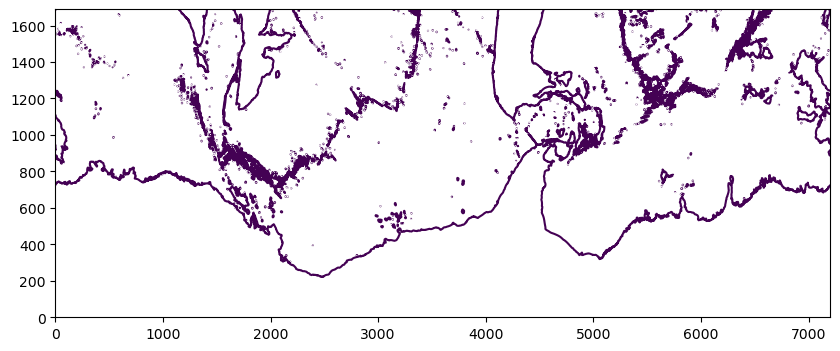

In [92]:
fig = plt.figure(figsize = (10, 4))
sc = plt.contour(depth_2_edit, levels=[contour_depth])

path_vertices = (sc.get_paths()[0]).vertices
x_vertices = path_vertices[:, 0]
y_vertices = path_vertices[:, 1]

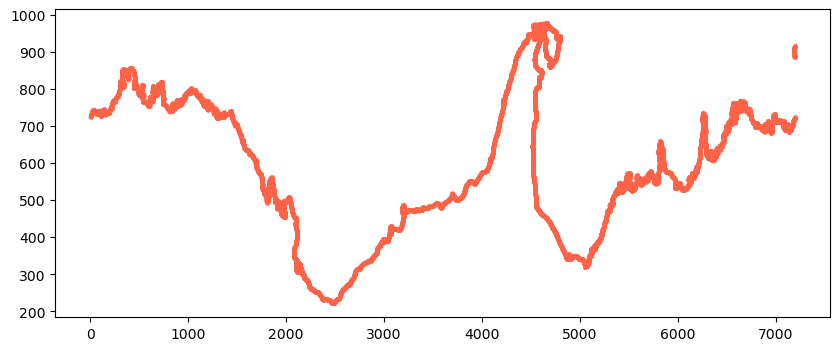

In [93]:
last_contour_index = np.where(np.abs(np.diff(x_vertices).astype(int)) > 1)[0][0]

x_contour = x_vertices[:last_contour_index + 1]
y_contour = y_vertices[:last_contour_index + 1]

# Check desired contour looks right:
fig = plt.figure(figsize = (10, 4))
plt.scatter(x_contour, y_contour, s=5, alpha=0.5, color='tomato');

In [94]:
x_contour = np.round(x_contour).astype(int)
y_contour = np.round(y_contour).astype(int)

# check that the difference between coords of contour never increase by more than 1:
if np.max(np.abs(np.diff(x_contour))) != 1:
    print('help! x_contour increases by more than 1 between coords.')

if np.max(np.abs(np.diff(y_contour))) != 1:
    print('help! y_contour increases by more than 1 between coords.')

help! y_contour increases by more than 1 between coords.


In [95]:
# Difference between two neighbouring indices
diff_x_contour = np.diff(x_contour)
diff_y_contour = np.diff(y_contour)

# Get a list with the indices of duplicates
diff_ind = []
for ii in range(len(diff_x_contour)):
    if (diff_x_contour[ii]==0) and (diff_y_contour[ii]==0):
        diff_ind.append(ii)

In [96]:
# Now remove the indices (start from the end so the indices don't shift)
for ii in range(len(diff_ind)):
    index = diff_ind[::-1][ii]
    x_contour = np.delete(x_contour, index)
    y_contour = np.delete(y_contour, index)

In [97]:
depth_2_edit_contour = np.zeros(len(x_contour))

for ii in range(len(depth_2_edit_contour)):
    depth_2_edit_contour[ii] = depth_2_edit[y_contour[ii], x_contour[ii]]

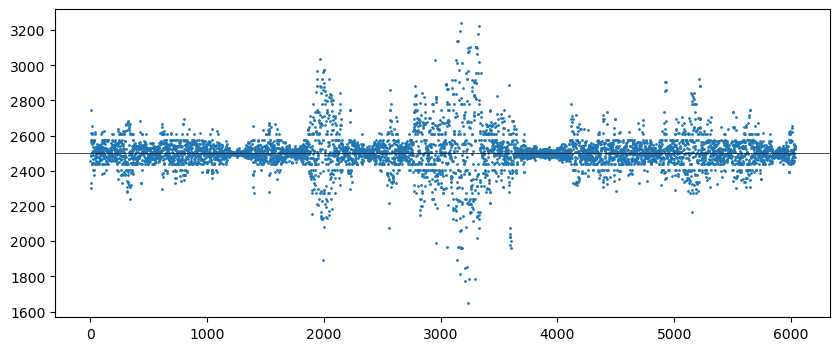

In [98]:
fig = plt.figure(figsize=(10, 4))

plt.plot(depth_1_edit_contour, 'o', markersize=1)
plt.axhline(contour_depth, color='k', linewidth=0.5);

In [99]:
# Number of grid points on the contour
num_points = len(x_contour)
num_points

13470

In [100]:
# start numbering from 1 not 0:
contour_mask_numbered = np.arange(1, len(x_contour)+1)

In [101]:
contour_mask = xr.zeros_like(depth_2_edit)

for ii in range(num_points):
    contour_mask[y_contour[ii], x_contour[ii]] = contour_mask_numbered[ii]

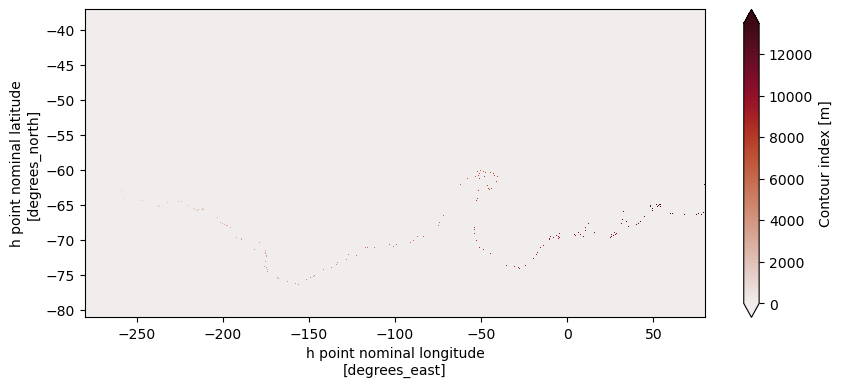

In [102]:
contour_mask.attrs['long_name'] = 'Contour index'
plt.figure(1, figsize=(10, 4))
contour_mask.plot(extend='both', cmap = cm.cm.amp);

In [103]:
contour_mask

<xarray.DataArray 'deptho' (yh: 1690, xh: 7200)> Size: 49MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * xh       (xh) float64 58kB -280.0 -279.9 -279.9 -279.8 ... 79.87 79.92 79.97
  * yh       (yh) float64 14kB -81.1 -81.08 -81.06 ... -37.16 -37.12 -37.08
Attributes:
    units:          m
    long_name:      Contour index
    cell_methods:   area:mean yh:mean xh:mean time: point
    cell_measures:  area: areacello
    standard_name:  sea_floor_depth_below_geoid

In [104]:
%%time

mask_value = -1000
contour_mask_numbered = contour_mask

# fill in points to north of contour:
contour_masked_above = np.copy(contour_mask_numbered)
contour_masked_above[-1, 0] = mask_value

# from top left:
for ii in range(len(contour_mask.xh)-1):
    for jj in range(len(contour_mask.yh))[::-1][:-1]:
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj-1, ii] == 0:
                contour_masked_above[jj-1, ii] = mask_value
            if contour_masked_above[jj, ii+1] == 0:
                contour_masked_above[jj, ii+1] = mask_value

#from top right:
for ii in range(len(contour_mask.xh))[::-1][:-1]:
    for jj in range(len(contour_mask.yh))[::-1][:-1]:
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj-1, ii] == 0:
                contour_masked_above[jj-1, ii] = mask_value
            if contour_masked_above[jj, ii-1] == 0:
                contour_masked_above[jj, ii-1] = mask_value

# from bottom right:
for ii in range(len(contour_mask.xh))[::-1][:-1]:
    for jj in range(len(contour_mask.yh)-1):
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj+1, ii] == 0:
                contour_masked_above[jj+1, ii] = mask_value
            if contour_masked_above[jj, ii-1] == 0:
                contour_masked_above[jj, ii-1] = mask_value

#from bottom left:
for ii in range(len(contour_mask.xh)-1):
    for jj in range(len(contour_mask.yh)-1):
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj+1, ii] == 0:
                contour_masked_above[jj+1, ii] = mask_value
            if contour_masked_above[jj, ii+1] == 0:
                contour_masked_above[jj, ii+1] = mask_value

CPU times: user 3min 14s, sys: 60.8 ms, total: 3min 14s
Wall time: 3min 14s


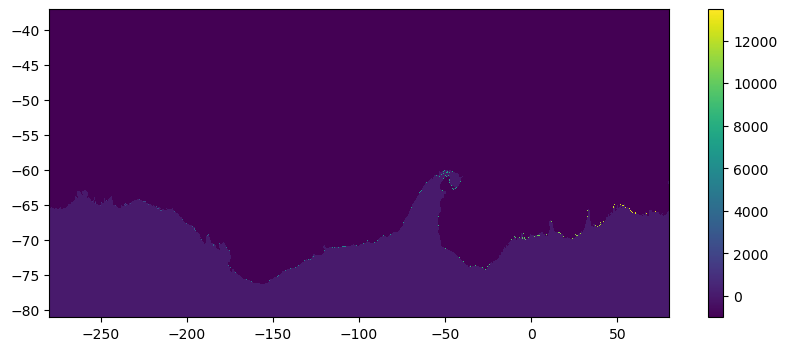

In [105]:
plt.figure(1, figsize=(10, 4))

plt.pcolormesh(contour_mask.xh, contour_mask.yh, contour_masked_above)
plt.colorbar()

In [106]:
contour_masked_above_da = xr.DataArray(
    contour_masked_above,
    dims=("yh", "xh"),
    coords={"yh": contour_mask.yh, "xh": contour_mask.xh},
    name="contour_masked_above"
)

In [107]:
contour_masked_above_da

<xarray.DataArray 'contour_masked_above' (yh: 1690, xh: 7200)> Size: 49MB
array([[    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       ...,
       [-1000., -1000., -1000., ..., -1000., -1000., -1000.],
       [-1000., -1000., -1000., ..., -1000., -1000., -1000.],
       [-1000., -1000., -1000., ..., -1000., -1000., -1000.]],
      dtype=float32)
Coordinates:
  * yh       (yh) float64 14kB -81.1 -81.08 -81.06 ... -37.16 -37.12 -37.08
  * xh       (xh) float64 58kB -280.0 -279.9 -279.9 -279.8 ... 79.87 79.92 79.97

In [108]:
contour_masked_above_da.to_netcdf('/g/data/g40/kc5856/panant-005-2500m-isobath-contour_masked_above.nc')

In [87]:
contour_masked_above_da.to_netcdf('/g/data/g40/kc5856/panant-01-2500m-isobath-contour_masked_above.nc')

In [66]:
contour_masked_above_da.to_netcdf('/g/data/g40/kc5856/panant-01-2000m-isobath-contour_masked_above.nc')

In [46]:
contour_mask.to_netcdf('/g/data/g40/kc5856/panant-005-2000m-isobath-mask.nc')

In [28]:
contour_mask.to_netcdf('/g/data/g40/kc5856/panant-01-2000m-isobath-mask.nc')